# Aprendizaje supervisado

Objetivos de la práctica:
* Conocer cómo funcionan los algoritmos de clasificación de la librería sklearn.
* Estudiar un problema de clasificación binaria.
* Estudiar un problema de clasificación múltiple



## Clasificación binaria

Para el problema de la clasificación binaria vamos a utilizar el dataset pima-indians-diabetes.csv. Este dataset es utilizado de manera habitual en aprendizaje automático. El dataset describe datos médicos de pacientes y si tuvieron diabetes en los 5 años siguientes. En concreto cada fila del dataset representa un
paciente. Cada fila consta de 9 valores numéricos separados por comas, los 8 primeros valores son los descriptores que dan información sobre:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

El ultimo valor de la fila es siempre o bien un 1 o un 0 dependiendo de si el
paciente tuvo diabetes o no.

### Paso 0: Carga de datos

Comenzamos descargando el dataset.

In [1]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/pima-indians-diabetes.csv -O pima-indians-diabetes.csv

--2023-09-14 07:06:56--  https://raw.githubusercontent.com/IA1819/Datasets/master/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.002s  

2023-09-14 07:06:56 (13.4 MB/s) - ‘pima-indians-diabetes.csv’ saved [23279/23279]



Cargamos los datos del fichero pima-indians-diabetes.csv utilizando la librería pandas. Notar que como el dataset no contiene una cabecera estamos usando el atributo `header=None`.

In [2]:
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.csv',header=None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Pasamos ahora a almacenar los vectores de descriptores en una variable X y las etiquetas en una variable Y.

In [3]:
X =  df.values[:,:-1]
Y =  df.values[:,-1]

En esta práctica no hay tests, pero al ejecutar la siguiente celda deberías obtener los siguientes valores para las distintas variables.

|expresión|resultado|
|---|---|
|Longitud X|768|
|X[4]|[  0.    137.     40.     35.    168.     43.1     2.288  33.   ]|
|Y[11]|1.0|
|Y[50]|0.0|

In [4]:
print("Longitud X:")
print(len(X))
print("X[4]:")
print(X[4])
print("Y[11]:")
print(Y[11])
print("Y[50]:")
print(Y[50])

Longitud X:
768
X[4]:
[  0.    137.     40.     35.    168.     43.1     2.288  33.   ]
Y[11]:
1.0
Y[50]:
0.0


### Paso 1: Partición de conjunto de entrenamiento y de test

Como vimos en clase es muy importante separar el conjunto de instancias en dos grupos: el conjunto de entrenamiento y el conjunto de test. Para ello, podemos utilizar la función ```train_test_split``` de la librería ```sklearn```.

In [5]:
from sklearn.model_selection import train_test_split

A la función train_test_split le vamos a pasar 4 parámetros:

 - las instancias de nuestro dataset (sin etiqueta), es decir X,
 - las etiquetas (es decir Y),
 - el porcentage del dataset que se utilizará para el conjunto de test
   (en este caso 0.25).
 - el estado aleatorio: un número para poder reproducir los resultados.

El resultado devuelto por la función es una tupla de 4 elementos que
contiene el conjunto de entrenamiento, el conjunto de test, las etiquetas
del conjunto de entrenamiento y las etiquetas del conjunto de test.

In [6]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.25, random_state=42)

##### Ejercicio

Modifica a continuación la llamada anterior a la función train_test_split para que el conjunto de testing sea un 10% del total utilizando el mismo random_state que antes.

In [7]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.1, random_state=42)

Si has hecho correctamente la división deberías obtener los siguientes resultados al evaluar la siguiente celda.

|Expresión|Resultado|
|---|---|
|trainLabels[9]|1|
|testLabels[26]| 0|
|trainData[21]|[   0   ,  177   ,  60  ,  29   ,    222  ,   34  ,   1,   21   ]|
|testData[11]|[ 7.00e+00, 1.79e+02 ,9.50e+01, 3.10e+01 ,0.00e+00 ,3.42e+01 ,1.64e-01 ,6.00e+01]|

In [8]:
print("trainLabels[9]")
print(trainLabels[9])
print("testLabels[26]")
print(testLabels[26])
print("trainData[21]")
print(trainData[21].astype("uint8"))
print("testData[11]")
print(testData[11])

trainLabels[9]
1.0
testLabels[26]
0.0
trainData[21]
[  0 177  60  29 222  34   1  21]
testData[11]
[7.00e+00 1.79e+02 9.50e+01 3.10e+01 0.00e+00 3.42e+01 1.64e-01 6.00e+01]


### Paso 2: Entrenando distintos algoritmos

A continuación veremos como entrenar los algoritmos de clasificación vistos
en clase. La ventaja de los clasificadores implementados en ```sklearn``` es que
todos ellos están implementados como clases que heredan de una clase
llamada ```ClassifierMixin```, por lo que el proceso para entrenarlos y probarlos
va a ser siempre el mismo. Además tiene la ventaja de que podremos cambiar
de clasificador de manera muy sencilla.

Como veremos el proceso para usar los clasificadores va a constar de los
siguientes pasos: 1) Crear una instancia del clasificador que vamos a utilizar
(este paso depende claramente del clasificador), 2) entrenarlo mediante el
método ```fit``` de la clase ```ClassifierMixin```, y 3) hacer predicciones mediante
el método ```predict``` de la clase.

#### KNN

Empezamos por el clasificador más sencillo de todos, el KNN. Lo primero que hacemos es importar el clasificador

In [9]:
from sklearn.neighbors import KNeighborsClassifier

Construimos una instancia del clasificador utilizando 5 vecinos

In [10]:
modelKNN = KNeighborsClassifier(n_neighbors=5)

Entrenamos el clasificador pasándole el conjunto de entrenamiento y las etiquetas.

In [11]:
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier()

Una vez que el modelo está entrenado, podemos hacer predicciones con las instancias del conjunto de test

In [12]:
modelKNN.predict(testData[0].reshape(1,-1))

array([0.])

In [13]:
testLabels[0]

0.0

Notad que también podemos hacer predicciones sobre todo el conjunto de test.

In [14]:
modelKNN.predict(testData)

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1.])

##### Ejercicio

¿Qué clase devuelve este clasficador para la decima instancia del conjunto de test?

In [15]:
modelKNN.predict(testData[9].reshape(1,-1))

array([1.])

##### Ejercicio

¿Cuántas predicciones cambian si pasamos de 5 a 7 vecinos? Añade todas las celdas que necesites a continuación.

In [16]:
modelKNN = KNeighborsClassifier(n_neighbors=7)

In [17]:
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=7)

In [18]:
modelKNN.predict(testData)

array([0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1.])

#### Redes neuronales

Como vimos en teoría el Perceptron es el tipo de red neuronal más sencillo. A continuación vamos a definir un modelo que usa el algoritmo de Perceptron con ratio de aprendizaje de 1.0 y los datos pasarán 10 veces por el.

In [19]:
from sklearn.linear_model import Perceptron
modelPerceptron = Perceptron(max_iter=10,eta0=1.0,random_state=84)
modelPerceptron.fit(trainData,trainLabels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(max_iter=10, random_state=84)

Veámos como construir un Perceptron multicapa con dos capas ocultas, la primera con 5 unidades y la segunda con 2 unidades, con ratio de aprendizaje 0.01, momento 0.9.

In [20]:
from sklearn.neural_network import MLPClassifier
modelMultiLayerPerceptron = MLPClassifier(hidden_layer_sizes=(5,2),learning_rate_init=0.01,momentum=0.9)
modelMultiLayerPerceptron.fit(trainData,trainLabels)

MLPClassifier(hidden_layer_sizes=(5, 2), learning_rate_init=0.01)

##### Ejercicio
Crear un Perceptron multicapa con una capa oculta con tres unidades, entrenarlo y almacenalo en una variable llamada ```modelMultiLayerPerceptron2```.

In [21]:
modelMultiLayerPerceptron2 = MLPClassifier(hidden_layer_sizes=(3),learning_rate_init=0.01,momentum=0.9)
modelMultiLayerPerceptron2.fit(trainData,trainLabels)

MLPClassifier(hidden_layer_sizes=3, learning_rate_init=0.01)

### Paso 3: Evaluando los modelos

Una vez tenemos entrenados los algoritmos podemos evaluarlos en el conjunto de test usando distintas métricas como *accuracy*, *recall*, *precision*, o *f1-score*. Para ello de nuevo utilizamos la librería sklearn.


In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

Ahora ya podemos evaluar cada uno de nuestros modelos en nuestro conjunto de test. Todas las funciones definidas previamente esperan recibir una lista con los valores esperados, y otra lista con los valores predichos.

In [23]:
??accuracy_score

Veámos los resultados obtenidos con el modelo de KNN.

In [24]:
print('Accuracy: %f' % accuracy_score(testLabels,modelKNN.predict(testData)))
print('Precision: %f' % precision_score(testLabels,modelKNN.predict(testData)))
print('Recall: %f' % recall_score(testLabels,modelKNN.predict(testData)))
print('F1-Score: %f' % f1_score(testLabels,modelKNN.predict(testData)))

Accuracy: 0.675325
Precision: 0.531250
Recall: 0.629630
F1-Score: 0.576271


In [25]:
print('Accuracy: %f' % accuracy_score(testLabels,modelMultiLayerPerceptron.predict(testData)))
print('Precision: %f' % precision_score(testLabels,modelMultiLayerPerceptron.predict(testData)))
print('Recall: %f' % recall_score(testLabels,modelMultiLayerPerceptron.predict(testData)))
print('F1-Score: %f' % f1_score(testLabels,modelMultiLayerPerceptron.predict(testData)))

Accuracy: 0.649351
Precision: 0.000000
Recall: 0.000000
F1-Score: 0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


También es posible mostrar la matriz de confusión del siguiente modo.

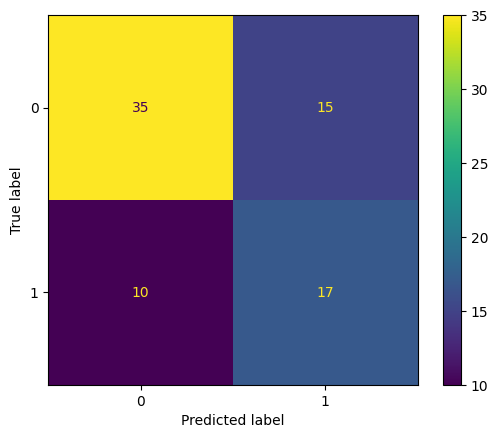

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(testLabels,modelKNN.predict(testData))

cm_display = ConfusionMatrixDisplay(cm).plot()